In [1]:
#importing libraries and dataset
#dataset source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
import numpy as np
import pandas as pd
import sklearn as sk

df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [2]:
df #view dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.info() #check columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [20]:
df.describe() #information of numerical columns

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
df.corr() #check correlation between all numerical columns

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


We see that Stress Level and Quality of Sleep have a strong negative correlation of -0.898752. This means that the more the stress, the worse is the quality of sleep.

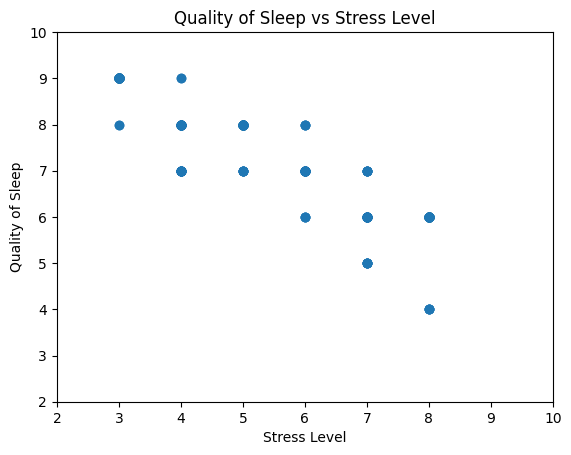

In [40]:
import matplotlib.pyplot as plt

plt.scatter(x=df['Stress Level'],y=df['Quality of Sleep'])
plt.xlim(2,10)
plt.ylim(2,10)
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Quality of Sleep vs Stress Level')
plt.show()

As shown visually, there seems to be a linear relation between the two. So, we are going to make a linear regression model using these two parameters, where we predict quality of sleep based on stress level.

In [16]:
#check for null values
print(df['Quality of Sleep'].isnull().sum())
print(df['Stress Level'].isnull().sum())

0
0


Thus, there are no null values to fill.

In [19]:
#create training and testing data from the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x=df['Stress Level'].values.reshape(-1,1)
y=df['Quality of Sleep'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7) #70% of the data will be for training and the rest for testing

mod=LinearRegression() #create linear regression model
mod.fit(x_train,y_train)

LinearRegression()

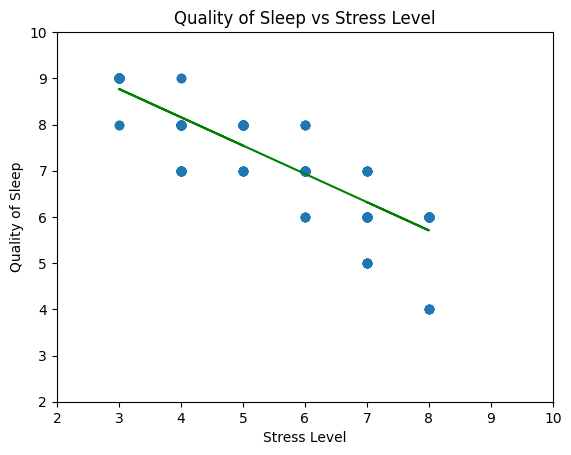

In [39]:
#plotting the regression line
plt.scatter(df['Stress Level'],df['Quality of Sleep'])
plt.plot(x_test,y_predicted,color='green')
plt.xlim(2,10)
plt.ylim(2,10)
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Quality of Sleep vs Stress Level')
plt.show()

In [26]:
#predict a user entered value

stress=int(input('Enter stress level from 0-10: '))
stress=np.array([stress])
stress
print('Predicted quality of sleep = ',mod.predict(stress.reshape(1,1))[0][0])

Enter stress level from 0-10: 8
Predicted quality of sleep =  5.708082261959942


In [33]:
#check for accuracy metrics

import sklearn.metrics as mt

y_predicted=mod.predict(x_test) #create an array of predicted values from the x points stored as testing data
#check accuracy of model against actual values from testing data
print('Mean squared error: ',mt.mean_squared_error(y_test,y_predicted))
print('Mean absolute error: ',mt.mean_absolute_error(y_test,y_predicted))
print('Max error: ',mt.max_error(y_test,y_predicted))
print('R2 score: ',mt.r2_score(y_test,y_predicted))

Mean squared error:  0.2735558289878069
Mean absolute error:  0.3998488031537735
Max error:  1.7080822619599418
R2 score:  0.8041534159527016
